/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of Clusters: 2, Davies-Bouldin Index: 1.0453441431107011
Number of Clusters: 3, Davies-Bouldin Index: 0.880153375840541
Number of Clusters: 4, Davies-Bouldin Index: 1.0129729953001558
Number of Clusters: 5, Davies-Bouldin Index: 0.9861830094533112
Number of Clusters: 6, Davies-Bouldin Index: 0.93868183436886
Number of Clusters: 7, Davies-Bouldin Index: 1.0017103905266684
Number of Clusters: 8, Davies-Bouldin Index: 1.103207559318704
Number of Clusters: 9, Davies-Bouldin Index: 0.9974098917802456
Number of Clusters: 10, Davies-Bouldin Index: 1.0018577022714232


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


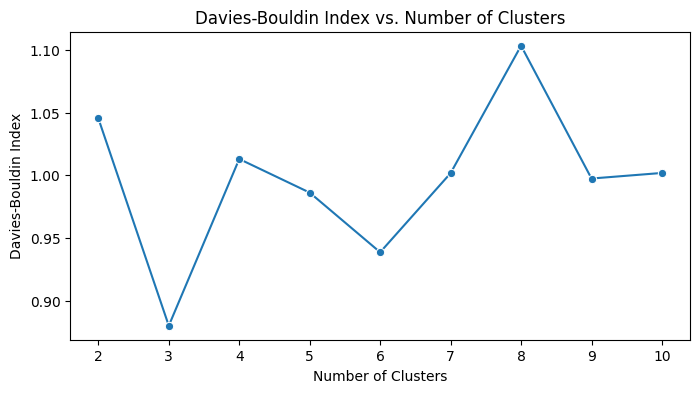

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/kaggle/input/zeotap/Customers.csv")
products = pd.read_csv("/kaggle/input/zeotap/Products.csv")
transactions = pd.read_csv("/kaggle/input/zeotap/Transactions.csv")

# Data Preprocessing
# Convert 'TransactionDate' to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Feature Engineering
# Calculate Recency, Frequency, and Monetary (RFM) metrics
current_date = transactions['TransactionDate'].max() + pd.Timedelta(days=1)
rfm = transactions.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TotalValue': 'Monetary'
}).reset_index()

# Merge RFM metrics with customer profile data
customer_data = pd.merge(customers, rfm, on='CustomerID', how='inner')

# Strip any leading/trailing spaces from column names
customer_data.columns = customer_data.columns.str.strip()

# Verify the presence of required columns
required_columns = ['Recency', 'Frequency', 'Monetary']
missing_columns = [col for col in required_columns if col not in customer_data.columns]

if missing_columns:
    print(f"Missing columns in the data: {missing_columns}")
else:
    # Select relevant features for clustering
    data_for_clustering = customer_data[required_columns].dropna()

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data_for_clustering)

    # Clustering and Evaluation
    db_indices = []
    cluster_range = range(2, 11)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(scaled_features)
        db_index = davies_bouldin_score(scaled_features, labels)
        db_indices.append(db_index)
        print(f'Number of Clusters: {k}, Davies-Bouldin Index: {db_index}')

    # Plotting the Davies-Bouldin Index against the number of clusters
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=list(cluster_range), y=db_indices, marker='o')
    plt.title('Davies-Bouldin Index vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Index')
    plt.show()
